In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [19]:
# Load data
data = pd.read_csv('df_ml.csv')

In [20]:
from scipy.stats import zscore
data_2 = data.apply(zscore)
data_3 = data_2[(data_2.abs() <= 4).all(axis=1)]
print(data_3.describe())
print(data_3.shape)

        laRatesPaid     GVP_ratio  voaFloorArea          Days          year  \
count  17227.000000  17227.000000  17227.000000  17227.000000  17227.000000   
mean      -0.024905     -0.123805     -0.082033      0.064320     -0.012541   
std        0.204837      0.654000      0.514666      0.973140      0.996792   
min       -0.118288     -0.737346     -0.351314     -1.282895     -2.067804   
25%       -0.090580     -0.499913     -0.341973     -0.739692     -0.802716   
50%       -0.074062     -0.369137     -0.258063     -0.230893     -0.170172   
75%       -0.034738      0.096288     -0.070316      0.833260      1.094915   
max        3.931336      3.907527      3.994841      2.065330      1.094915   

       voaCategory_INDUSTRIAL  voaCategory_LEISURE  voaCategory_OFFICE  \
count            17227.000000         17227.000000        17227.000000   
mean                -0.013730             0.047907           -0.021227   
std                  0.990358             1.017863            0.97

In [21]:
data=data_3

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
# basic stats
print(data.describe())

# data num
print(data.shape)

        laRatesPaid     GVP_ratio  voaFloorArea          Days          year  \
count  17227.000000  17227.000000  17227.000000  17227.000000  17227.000000   
mean      -0.024905     -0.123805     -0.082033      0.064320     -0.012541   
std        0.204837      0.654000      0.514666      0.973140      0.996792   
min       -0.118288     -0.737346     -0.351314     -1.282895     -2.067804   
25%       -0.090580     -0.499913     -0.341973     -0.739692     -0.802716   
50%       -0.074062     -0.369137     -0.258063     -0.230893     -0.170172   
75%       -0.034738      0.096288     -0.070316      0.833260      1.094915   
max        3.931336      3.907527      3.994841      2.065330      1.094915   

       voaCategory_INDUSTRIAL  voaCategory_LEISURE  voaCategory_OFFICE  \
count            17227.000000         17227.000000        17227.000000   
mean                -0.013730             0.047907           -0.021227   
std                  0.990358             1.017863            0.97

In [24]:
# test and train data 
from sklearn.model_selection import train_test_split

# Select the data
## target laRatesPaid 
y = data['laRatesPaid']
X = data.drop(['laRatesPaid'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# random forest
from sklearn.ensemble import RandomForestRegressor

# Create the model
# grid search

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 200, 300]
}


# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 10)

# Fit the grid search to the data

grid_search.fit(X_train, y_train)

# best params

print(grid_search.best_params_)

# best model

best_grid = grid_search.best_estimator_

# Predict the target

y_pred = best_grid.predict(X_test)

# Evaluate the model

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

# save the model

import joblib

joblib.dump(best_grid, 'model.pkl')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.016582490848254135


['model.pkl']

In [26]:
mse_list = []
for i in range(y_test.shape[0]):
    mse_list.append((y_test.values[i] - y_pred[i]))


[1.4766337071013753, 1.4757765566944598, 1.4062762585783863, 1.358532211319009, 1.3271238740684776, 1.2430275215469, 1.230286474452713, 1.1665182310220679, 1.0509144649400808, 0.8117535835859999]


In [27]:
# load the model

model = joblib.load('model.pkl')

In [28]:
# predict the target

y_pred = model.predict(X_test)

In [29]:
# evaluate the model
## prediction accuracy percentage
mse=[]
for i in range(len(y_test)):
    mse.append((y_test.iloc[i]-y_pred[i])**2)

In [30]:
np.mean(mse)

0.016582490848254135

In [31]:
np.sqrt(np.mean(mse))

0.12877302065360638

In [32]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.6567899948347545


                   Feature  Importance
1             voaFloorArea    0.614349
0                GVP_ratio    0.131968
2                     Days    0.083006
8       voaCategory_RETAIL    0.057944
4   voaCategory_INDUSTRIAL    0.052363
3                     year    0.031261
5      voaCategory_LEISURE    0.015064
6       voaCategory_OFFICE    0.010968
7        voaCategory_OTHER    0.003077
9                 Vacant_0    0.000000
10                Vacant_1    0.000000


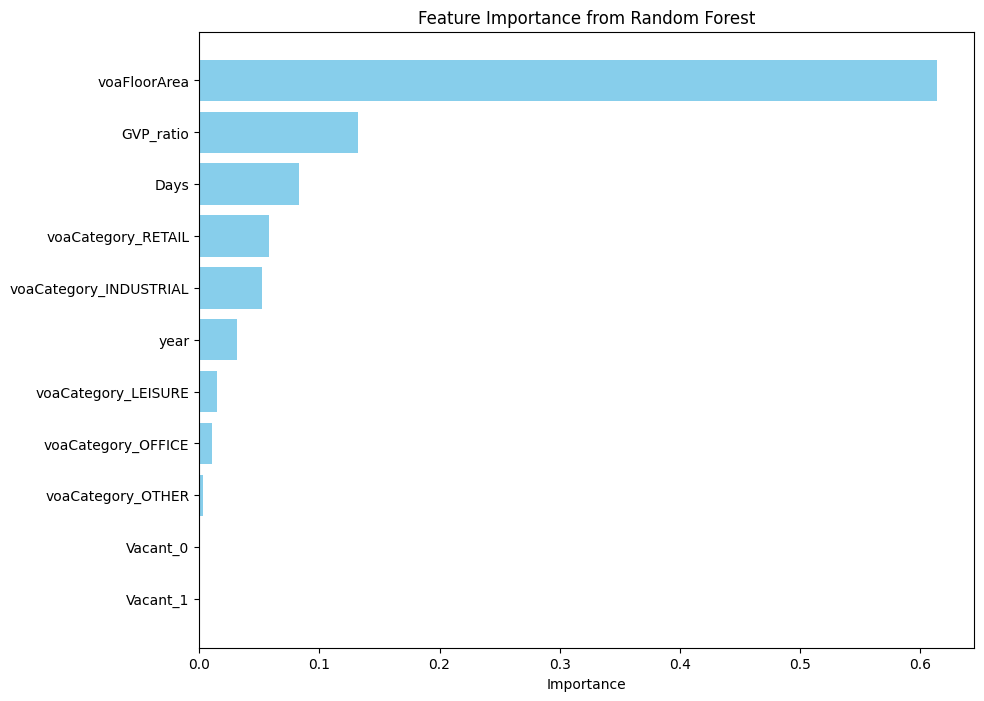

In [33]:
feature_names = X_train.columns  

importances = best_grid.feature_importances_

feature_importance_list = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_list = feature_importance_list.sort_values(by='Importance', ascending=False)

print(feature_importance_list)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_list['Feature'], feature_importance_list['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()

In [36]:
# correlation analysis
# only keep numerical data
data_num = data.select_dtypes(include=['float64'])

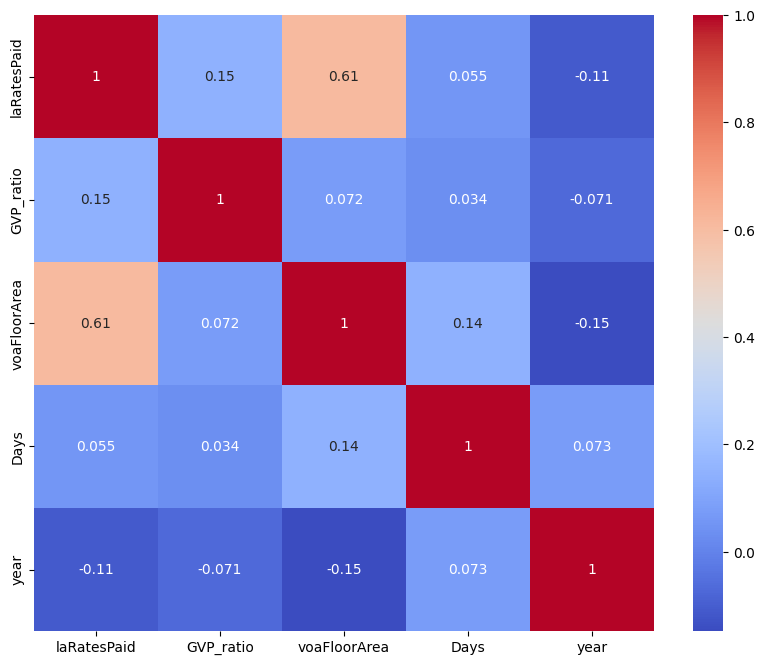

In [67]:
import seaborn as sns 
# correlation analysis
# only keep numerical data, drop binaries data types
data_num = data.select_dtypes(include=['float64'])
data_num = data_num[['laRatesPaid','GVP_ratio','voaFloorArea','Days','year']]
# correlation analysis

correlation = data_num.corr()
correlation.style.background_gradient(cmap='coolwarm')
# plot correlation with lighter colour

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')#lighter colour

plt.show()





In [38]:
correlation

,laRatesPaid,GVP_ratio,voaFloorArea,Days,year,voaCategory_INDUSTRIAL,voaCategory_LEISURE,voaCategory_OFFICE,voaCategory_OTHER,voaCategory_RETAIL,Vacant_0,Vacant_1
laRatesPaid,1.000000,0.147190,0.609628,0.054716,-0.111811,0.025515,-0.177743,0.017509,-0.032802,0.168651,NaN,NaN
GVP_ratio,0.147190,1.000000,0.072263,0.033863,-0.071135,-0.051870,-0.177509,0.122883,-0.028039,0.163867,NaN,NaN
voaFloorArea,0.609628,0.072263,1.000000,0.144773,-0.148030,0.338593,-0.336599,-0.016171,0.042029,0.035684,NaN,NaN
Days,0.054716,0.033863,0.144773,1.000000,0.072874,0.053793,-0.191533,-0.046683,0.222336,0.064372,NaN,NaN
year,-0.111811,-0.071135,-0.148030,0.072874,1.000000,-0.079272,0.160289,-0.052282,-0.015369,-0.052496,NaN,NaN
voaCategory_INDUSTRIAL,0.025515,-0.051870,0.338593,0.053793,-0.079272,1.000000,-0.366553,-0.176702,-0.133045,-0.325405,NaN,NaN
voaCategory_LEISURE,-0.177743,-0.177509,-0.336599,-0.191533,0.160289,-0.366553,1.000000,-0.244745,-0.184277,-0.450709,NaN,NaN
voaCategory_OFFICE,0.017509,0.122883,-0.016171,-0.046683,-0.052282,-0.176702,-0.244745,1.000000,-0.088833,-0.217271,NaN,NaN
voaCategory_OTHER,-0.032802,-0.028039,0.042029,0.222336,-0.015369,-0.133045,-0.184277,-0.088833,1.000000,-0.163590,NaN,NaN
voaCategory_RETAIL,0.168651,0.163867,0.035684,0.064372,-0.052496,-0.325405,-0.450709,-0.217271,-0.163590,1.000000,NaN,NaN


In [39]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist = {
    'max_depth': randint(3, 10),  # 随机整数值
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),  # 连续均匀分布
    'subsample': uniform(0.6, 0.4),  # 0.6 到 1.0 之间
    'colsample_bytree': uniform(0.5, 0.5),  # 0.5 到 1.0 之间
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.1, 1)
}


In [40]:
xgb_reg = xgb.XGBRegressor()
random_search = RandomizedSearchCV(xgb_reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=89, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000165A29CFB50>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000165B219CD00>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000165B21EBB80>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000165B219F910>},
                   random_state=89, scoring='neg_mean_squared_error',
                   verbose=1)

In [41]:
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)


Best parameters found:  {'colsample_bytree': 0.8824011949270872, 'gamma': 0.08200906617700471, 'learning_rate': 0.06969522719944314, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 383, 'reg_alpha': 0.20763738871441706, 'reg_lambda': 0.6441422918298558, 'subsample': 0.9618870474669445}
Best score found:  -0.007627017902507828


In [42]:
# 从 RandomizedSearchCV 中获取最佳参数
best_params = random_search.best_params_

# 使用最佳参数重新训练模型
final_model = xgb.XGBRegressor(**best_params)

# 训练模型
final_model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.8824011949270872, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.08200906617700471, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.06969522719944314, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=383, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0.20763738871441706,
             reg_lambda=0.6441422918298558, ...)

In [43]:
y_pred = final_model.predict(X_test)

<Figure size 1000x800 with 0 Axes>

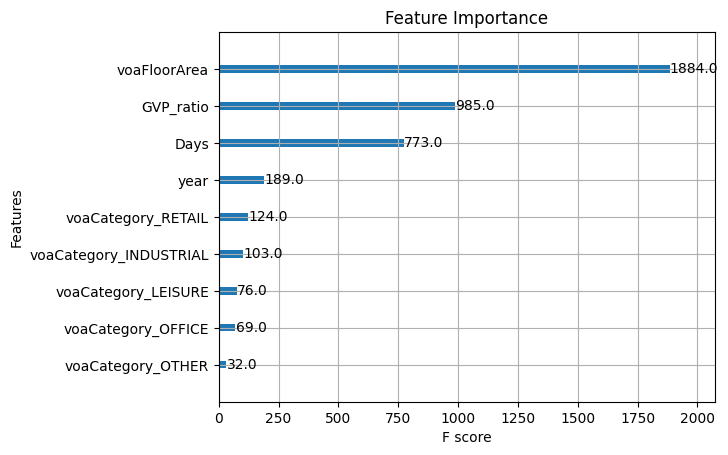

In [44]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 绘制特征重要性
plt.figure(figsize=(10, 8))
plot_importance(final_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

                   Feature  Importance
4   voaCategory_INDUSTRIAL    0.450763
8       voaCategory_RETAIL    0.172240
1             voaFloorArea    0.121643
6       voaCategory_OFFICE    0.070616
5      voaCategory_LEISURE    0.053187
2                     Days    0.043896
0                GVP_ratio    0.043342
3                     year    0.022640
7        voaCategory_OTHER    0.021673
9                 Vacant_0    0.000000
10                Vacant_1    0.000000


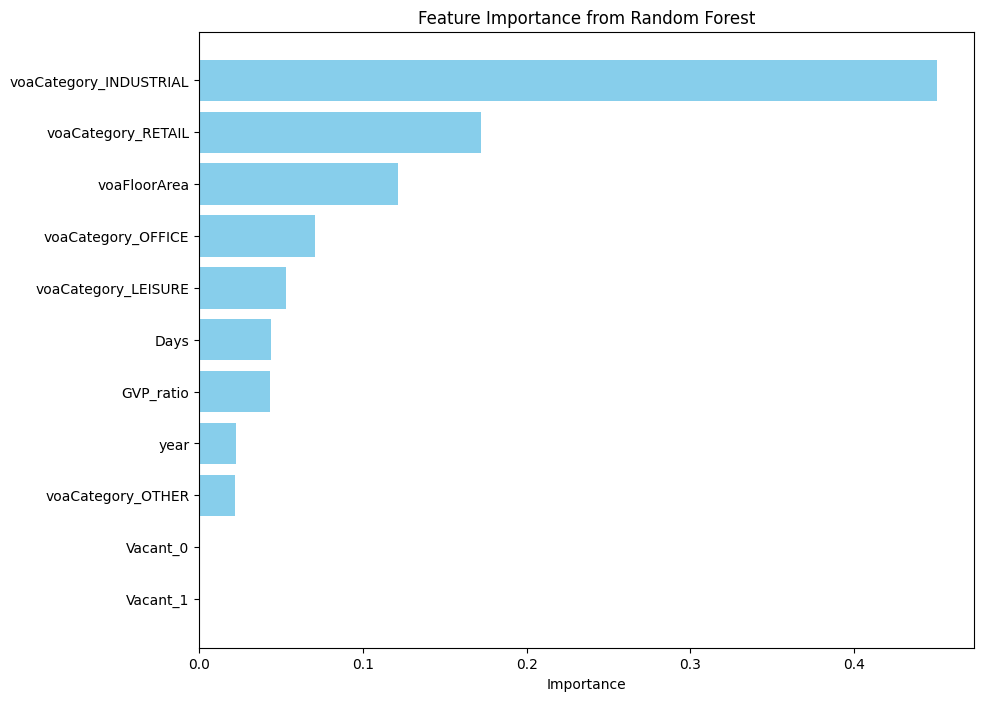

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的特征名称存储在变量 feature_names 中
feature_names = X_train.columns  # 如果 X_train 是 DataFrame，否则手动提供

# 获取特征重要性
importances = final_model.feature_importances_

# 将特征与其重要性值配对
feature_importance_list = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 按重要性排序
feature_importance_list = feature_importance_list.sort_values(by='Importance', ascending=False)

# 打印特征重要性列表
print(feature_importance_list)

# 可视化特征重要性
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_list['Feature'], feature_importance_list['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # 最重要的特征在顶部
plt.show()

In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


R²: 0.8091487247035729


In [47]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")


RMSE: 0.09602679773143223


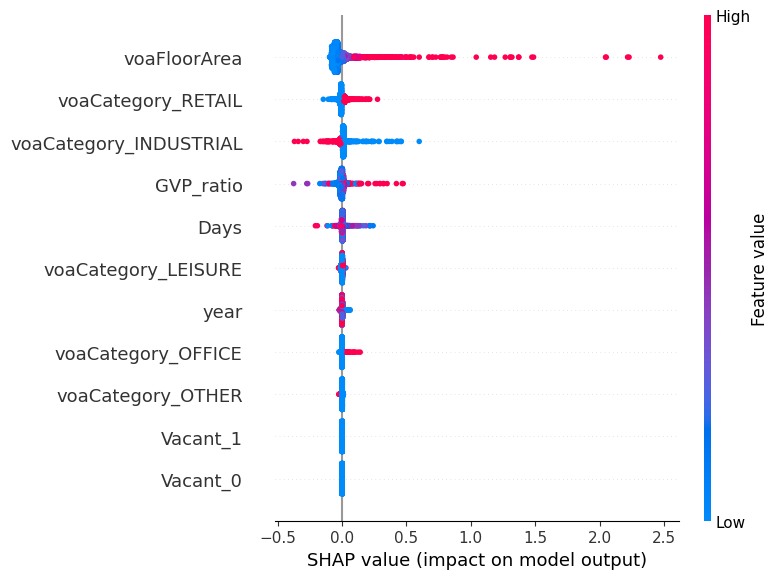

In [55]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [49]:
from sklearn.model_selection import cross_val_score
# 使用交叉验证评估模型性能，使用均方误差 (MSE) 作为评分标准
scores = cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5  # 计算 RMSE
print(f"Cross-validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

Cross-validation RMSE: 0.15223740374691758 ± 0.028119199450500076


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 预测
y_pred = final_model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# 计算预测误差
errors = y_test - y_pred

# 计算预测误差的标准差
std_error = np.std(errors)

# 计算测试集样本数量
n = len(y_test)

# 计算均方误差的标准误差 (SEMSE)
semse = std_error / np.sqrt(n)
print("Standard Error of Mean Squared Error (SEMSE):", semse)


Mean Squared Error (MSE): 0.009221145882553398
Standard Error of Mean Squared Error (SEMSE): 0.0016357364584679047


In [51]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# 使用随机森林作为基模型进行 RFE
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100), n_features_to_select=10, step=1)

# 训练 RFE 模型
rfe.fit(X_train, y_train)

# 被选中的特征
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features by RFE:", selected_features_rfe)


Selected features by RFE: Index(['GVP_ratio', 'voaFloorArea', 'Days', 'year', 'voaCategory_INDUSTRIAL',
       'voaCategory_LEISURE', 'voaCategory_OFFICE', 'voaCategory_OTHER',
       'voaCategory_RETAIL', 'Vacant_1'],
      dtype='object')


In [52]:
# 使用选择的特征重新训练模型
X_train_selected = X_train[selected_features_rfe]  # 或 selected_features (来自 Lasso)
X_test_selected = X_test[selected_features_rfe]    # 或 selected_features (来自 Lasso)

# 训练新的随机森林模型（或者其他模型）
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_selected, y_train)

# 预测并评估模型性能
y_pred_selected = model.predict(X_test_selected)
print("Mean Squared Error with selected features:", mean_squared_error(y_test, y_pred_selected))


Mean Squared Error with selected features: 0.009668180341441287


In [53]:
import pandas as pd

# 假设您的数据存储在 DataFrame df 中
correlation_matrix = data.corr()

# 查看 laRatesReliefsAmount 与其他变量的相关性
print(correlation_matrix['laRatesPaid'])


laRatesPaid               1.000000
GVP_ratio                 0.147190
voaFloorArea              0.609628
Days                      0.054716
year                     -0.111811
voaCategory_INDUSTRIAL    0.025515
voaCategory_LEISURE      -0.177743
voaCategory_OFFICE        0.017509
voaCategory_OTHER        -0.032802
voaCategory_RETAIL        0.168651
Vacant_0                       NaN
Vacant_1                       NaN
Name: laRatesPaid, dtype: float64
